# Create Gaussian random fields with lya survey geometry to compute $C_{\ell}(k)$

In [1]:
import os

In [2]:
os.getcwd()

'/Users/rdb/Desktop/research/lya/P3D_Cell/directsht-lya/notebooks'

In [3]:
%matplotlib inline
import os
import numpy as np
from matplotlib_params_file import *
import multiprocessing as mp
import healpy as hp

# GRFs
import GRF_class as my_GRF

# import function for SHT-lya
import SHT_lya as sht_lya

import sys
%env JAX_ENABLE_X64=True
#
#sys.path.insert(0, '/global/homes/r/rmvd2/lya_Cl/directsht-lya/')
sys.path.insert(0, '/Users/rdb/Desktop/research/lya/P3D_Cell/directsht-lya/')
from sht.sht                import DirectSHT
from sht.mask_deconvolution import MaskDeconvolution

try:
    from jax.lib import xla_bridge
    print(xla_bridge.get_backend().platform)
except:
    print("No GPU found")

env: JAX_ENABLE_X64=True
JAX not found. Falling back to NumPy.
JAX not found. Falling back to NumPy.
No GPU found


### start code

In [4]:
do_plots=True

# define GRF settings

# define number of qso drawn from the box
num_qso = int(1e+4)

# set `add_rsd=True' if you want to add RSD
add_rsd_=False

# shift GRF box
chi_shift = 5000. # Mpc/h

# Set up an sht instance.
Nl   = 500
Nx   = 2*Nl
xmax = 3./4.
#
sht= DirectSHT(Nl,Nx,xmax)
print("For general, Direct SHT has Nl=",sht.Nell,", Nx=",Nx," and xmax=",xmax)

# define index for calculation 
k_idx = 0


For general, Direct SHT has Nl= 500 , Nx= 1000  and xmax= 0.75


In [8]:

cl_k = []
wl_k = []
for idx, my_seed in enumerate(range(2)):
    # compute GRF
    my_seed = 1000 + my_seed
    GRF = my_GRF.PowerSpectrumGenerator(add_rsd=add_rsd_, seed=my_seed)
    # Sample skewers
    # Note that we apply a shift along the z axis. This is necessary to ensure that the $\mu$ angle is with respect to the z-axis
    # computes $\mu$ with respect to the combined line-of-sight; $(\vec{r}_i+\vec{r}_j)/2$    
    all_x, all_y, all_z, all_w_rand, all_w_gal, Nskew = GRF.process_skewers(Nskew=num_qso, shift=chi_shift)
    all_theta, all_phi = GRF.compute_theta_phi_skewer_start(all_x[:,0], all_y[:,0], all_z[:,0])
    chi_grid = all_x[0,:] # Mpc/h
    # definition of D=w*delta
    all_w_gal=all_w_gal-1.

    # compute discrete Fourier transform of matrix $N_{qso} \times N_{pix}$    
    k_arr, FT_mask, FT_delta = sht_lya.compute_dft(chi_grid, all_w_rand, all_w_gal)
    tdata,pdata,wdata = all_theta, all_phi, FT_delta.real
    trand,prand,wrand = all_theta, all_phi, FT_mask.real
    print(f'Nskew = {Nskew}, Nk = {wrand.shape[1]}')

    # measure $C_{\ell}(k)$ for different values of $k$
    hdat = sht(tdata,pdata,wdata[:,k_idx])
    # Do the same for the randoms.
    hran = sht(trand,prand,wrand[:,k_idx])
    # Anton normalization for FKP-type weights don't need that here
    # hran*= hdat[0]/hran[0]
    hdif = hp.alm2cl(hdat)
    wl   = hp.alm2cl(hran)
    cl_k.append(hdif) # C_\ell(k) data
    wl_k.append(wl) # C_\ell(k) randoms

cl_k = np.stack(cl_k)
wl_k = np.stack(wl_k)


Displacing box by 5.000e+03
Nskew = 9797, Nk = 512
Displacing box by 5.000e+03
Nskew = 9797, Nk = 512


In [16]:
np.fft.fft(all_w_rand[0])

array([512.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+

In [17]:
dchi = chi_grid[1]-chi_grid[0]
print(dchi)

2.7005870841485375


In [23]:
GRF.N/dchi

189.58840579711483

In [21]:
dk = np.fft.fft(all_w_rand[0]/dchi)
print(dk)

[189.5884058+0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.       +0.j   0.       +0.j   0.       +0.j
   0.       +0.j   0.    

# compute theory

In [ ]:
precompute_Wigner3j = True
if precompute_Wigner3j:
    # Wigner3j code
    import fast_Wigner3j as Wigner3j

    #initialize class
    couple_mat = Wigner3j.CoupleMat(Nl, wl_k[k_idx])
    coupling_matrix = couple_mat.compute_matrix()

    MD = MaskDeconvolution(Nl,wl_k[k_idx],precomputed_Wigner=coupling_matrix)
else:
    # if I want to use SHT for the Wigner3j computation
    print('use SHT native Wigner3j computation')
    %time MD = MaskDeconvolution(Nl,wl_k[k_idx])
#
# choose binning for Cell's
NperBin = 2**5
bins    = MD.binning_matrix('linear',0,NperBin)
Mbl     = MD.window_matrix(bins)
# # Look at the sums over ell.
# print("\nRow sums of Mbl:")
# print(Mbl.sum(axis=1))

print('cross checks ')
print(np.allclose(coupling_matrix, MD.Mll))

read in Wigner 3j matrix
cross checks 
True


In [ ]:
# Ndiscard = 2
# binned_ells,hdif_decoupled = MD(hdif,bins)
# binned_ells,hdif_decoupled = binned_ells[Ndiscard:-Ndiscard],hdif_decoupled[Ndiscard:-Ndiscard]

# compute theory power spectrum 
$$\Large  C_\ell(k)  = \sum_{L \lambda}  F_{\ell L \lambda} \int\frac{dk'}{2\pi\,\bar{\chi}^2}\ P(L/\bar{\chi},k') \sum_{jk} P_\lambda(\hat{n}_j\cdot\hat{n}_k) \widetilde{K}_j^\star(k-k')\widetilde{K}_k(k-k') $$
Let's do the computation for a $\textbf{periodic}$ box:
- we use the definition of $$ F_{\ell L \lambda} = \frac{(2L+1)(2\lambda+1)}{(4\pi)^2} \begin{pmatrix} \ell & L & \lambda \\ 0&0&0 \end{pmatrix}^2 $$
- using a periodic box, the $\widetilde{K}_j$ acts like a $\delta$ function
$$ C_\ell(k'=0)  = \sum_{L \lambda}  F_{\ell L \lambda} \frac{1}{2\pi\,\bar{\chi}^2}\ P(L/\bar{\chi},k=0) \sum_{jk} P_\lambda(\hat{n}_j\cdot\hat{n}_k) \widetilde{K}_j^\star(k'=0)\widetilde{K}_k(k'=0) = \sum_{L \lambda}  F_{\ell L \lambda} \frac{1}{2\pi\,\bar{\chi}^2}\ P_L P_\lambda N_k^2$$
$$ =\frac{1}{4\pi} \sum_{L} \left((2L+1) \sum_{\lambda} \frac{(2\lambda+1)}{4\pi} \begin{pmatrix} \ell & L & \lambda \\ 0&0&0 \end{pmatrix}^2 P_\lambda N_k^2\right) \frac{P_L}{2\pi\,\bar{\chi}^2} $$
we swap $\lambda$ and $L$ ordering (which does not change anything since the Wigner 3j symbols are squared):
$$ =\frac{1}{4\pi} \sum_{\lambda} \left((2\lambda+1) \sum_{L} \frac{(2L+1)}{4\pi} \begin{pmatrix} \ell & \lambda& L \\ 0&0&0 \end{pmatrix}^2 P_L\right) \frac{P_\lambda N_k^2}{2\pi\,\bar{\chi}^2} = \frac{1}{4\pi} \sum_{\lambda} M_{\ell \lambda} \frac{P_{\lambda}N_k^2}{2\pi\overline{\chi}^2}$$

where we use $M_{\ell L} = (2L+1)\sum_{\lambda} \frac{(2\lambda+1)}{ (4\pi)} \begin{pmatrix} \ell & L & \lambda \\ 0&0&0 \end{pmatrix}^2  P_{\lambda}$
which reduces the current computation to matrix products. 
<!-- Now, if we want to forward model the window, we apply the usual procedure
$$\hat{C}_{\ell}=\sum_{\ell'}M_{\ell \ell'}\left(\sum_{L} \frac{1}{2\pi\,\bar{\chi}^2} \frac{M_{\ell' L }}{ (4\pi)} P_L\right)$$ -->
and using the inequality 
$ \vert \ell - \lambda \vert \leq L \leq \vert \ell + \lambda \vert $ where $0 \leq \ell \leq 500$, $0 \leq \lambda \leq 500$ and $0 \leq L \leq 1000$.

In [126]:
lambda_max = 2000
# L_min, L_max = sht_lya.compute_Wigner3j_symmetry_range(Nl, lambda_max)

# print(L_min, L_max)

periodic=True

# Compute nhat
nhat = sht_lya.compute_nhat(tdata, pdata)
# Compute cos(theta_nj_nk)
cos_theta_njnk = np.dot(nhat, nhat.T)

if periodic:
    KjKk = GRF.N**2
else:
    KjKk = np.outer(FT_mask[:, k_idx], FT_mask[:, k_idx])

#test run to initialize numba 
_my_result = sht_lya.legendre_polynomials_sum(1, cos_theta_njnk,KjKk)
_my_result = sht_lya.legendre_polynomials_sum(2, cos_theta_njnk,KjKk)

print('compute the Legendre polynomials sum times the mask')
%time PLKjKk = sht_lya.legendre_polynomials_sum(lambda_max, cos_theta_njnk, KjKk)[:-1]
print('done')

1500 2500
compute the Legendre polynomials sum times the mask
CPU times: user 13min 37s, sys: 16min 25s, total: 30min 3s
Wall time: 4min 52s
done


In [129]:
def Power_spectrum(kh_perp, kh_par, add_rsd=add_rsd_):
    kh = np.sqrt(kh_par**2 + kh_perp**2)
    pk = GRF.plin(kh)
    Kaiser_factor = 1.
    if add_rsd:
        mu = kh_par / kh
        Kaiser_factor = GRF.my_bias**2 * (1. + GRF.my_beta * mu**2)**2
    # print(kh, pk)
    return Kaiser_factor * pk

compute for k index: 0 with chibar:  5690.0 and 1/(2 pi chi^2)=4.92e-09


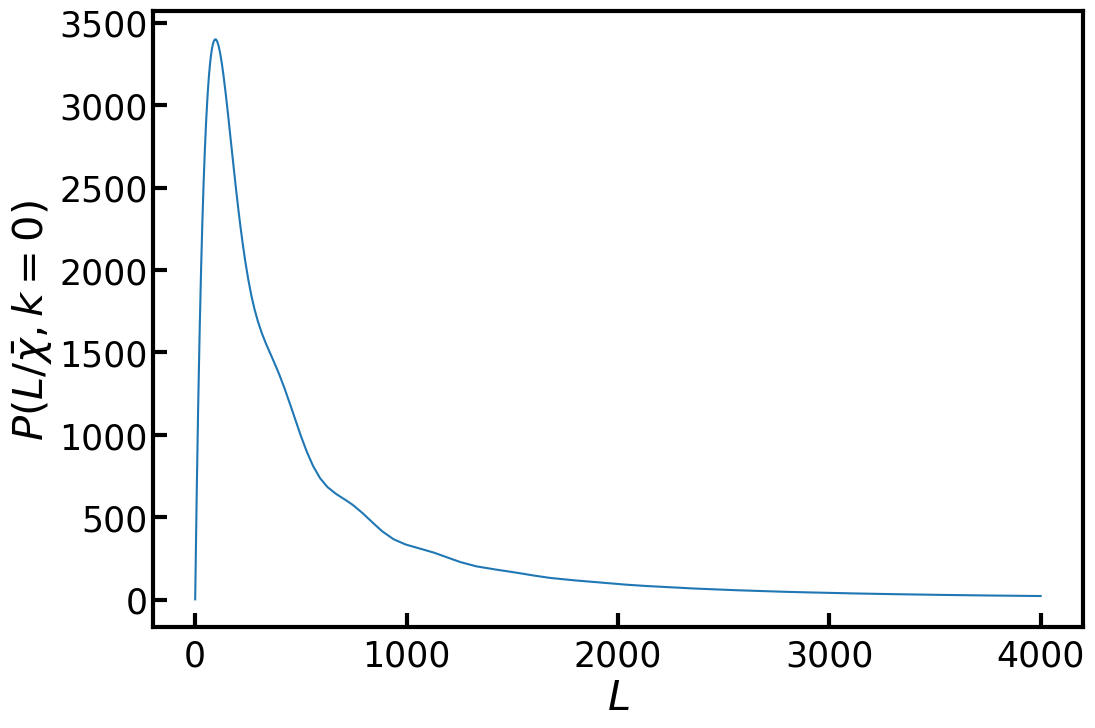

In [167]:
L_max=4000
# is the L range sufficient?
L_range = np.arange(0, L_max, 1)

# is chi bar approx correct?
chi_bar = (chi_grid.max()+chi_grid.min())/2
print('compute for k index:', k_idx, 'with chibar: ', chi_bar, f'and 1/(2 pi chi^2)={(1/(2.*np.pi*chi_bar**2)):.2e}')

# Limber approx for power spec
pk_L = Power_spectrum(kh_perp=L_range/chi_bar, kh_par=k_arr[k_idx])

if do_plots: plt.plot(L_range, pk_L);plt.xlabel(r'$L$');plt.ylabel(r'$P(L/\bar{\chi}, k=0)$');plt.show()

$$ C_\ell(k'=0)  = \sum_{L \lambda}  F_{\ell L \lambda} \frac{1}{2\pi\,\bar{\chi}^2}\ P(L/\bar{\chi},k=0) \sum_{jk} P_\lambda(\hat{n}_j\cdot\hat{n}_k) \widetilde{K}_j^\star(k'=0)\widetilde{K}_k(k'=0) = \sum_{L \lambda}  F_{\ell L \lambda} \frac{1}{2\pi\,\bar{\chi}^2}\ P_L P_\lambda N_k^2$$
$$ =\frac{1}{4\pi} \sum_{L} \left((2L+1) \sum_{\lambda} \frac{(2\lambda+1)}{4\pi} \begin{pmatrix} \ell & L & \lambda \\ 0&0&0 \end{pmatrix}^2 P_\lambda N_k^2\right) \frac{P_L}{2\pi\,\bar{\chi}^2} $$
we swap $\lambda$ and $L$ ordering (which does not change anything since the Wigner 3j symbols are squared):
$$ =\frac{1}{4\pi} \sum_{\lambda} \left((2\lambda+1) \sum_{L} \frac{(2L+1)}{4\pi} \begin{pmatrix} \ell & \lambda& L \\ 0&0&0 \end{pmatrix}^2 P_L\right) \frac{P_\lambda N_k^2}{2\pi\,\bar{\chi}^2} = \frac{1}{4\pi} \sum_{\lambda} M_{\ell \lambda} \frac{P_{\lambda}N_k^2}{2\pi\overline{\chi}^2}$$

In [187]:
def compute_power_spectrum(lambda_max, pk_L, PLKjKk, chi_bar=chi_bar, bins=bins, Nl=Nl, cl_k=cl_k, _k_idx=0):
    """
    Compute the binned theory power spectrum and the binned measured Cell's.
    """
    couple_mat = Wigner3j.CoupleMat(lambda_max, pk_L)
    coupling_matrix_pk_L = couple_mat.compute_matrix()

    # Compute theory power spectrum
    C_ell = np.dot(coupling_matrix_pk_L, PLKjKk) / (4. * np.pi) / (2. * np.pi * chi_bar**2)
    # Create ell range
    ells = np.arange(Nl)
    # Bin the theory power spectrum
    binned_C_ell = np.dot(bins, C_ell[:Nl])
    # Bin the measured Cell's
    binned_hdif = np.dot(bins, cl_k[_k_idx])    
    return binned_C_ell, binned_hdif

In [194]:
binned_Cell_Lmax4000 = compute_power_spectrum(lambda_max, pk_L, PLKjKk, chi_bar=chi_bar, bins=bins, Nl=Nl, cl_k=cl_k, _k_idx=0)

In [160]:
# binning
ells = np.arange(Nl)
my_binned_ells = np.dot(bins, ells)

binned_hdif = bins @ cl_k[_k_idx]


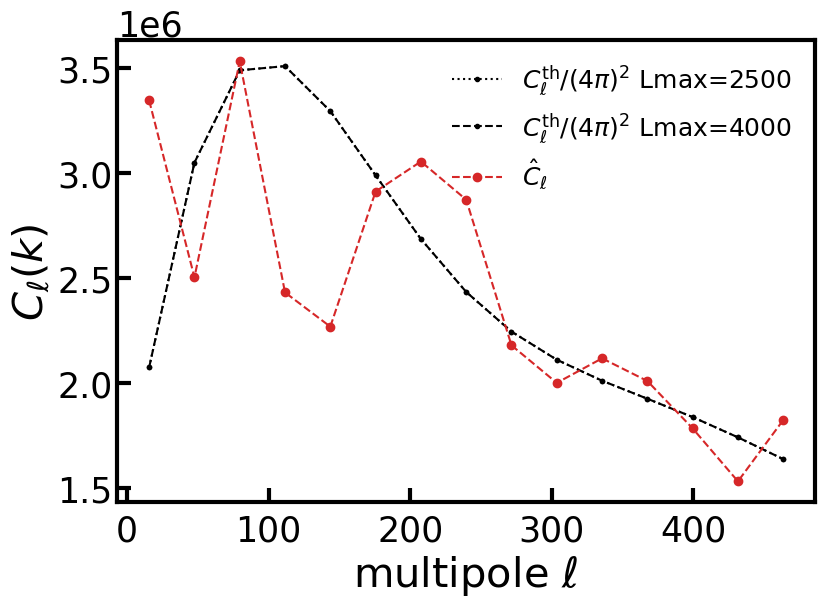

In [198]:
plt.figure(figsize=(9,6))
# plt.plot(my_binned_ells, binned_C_ell/(4*np.pi)**2, 'k.:', label=r'$C_{\ell}^{\rm th}/(4\pi)^2$ Lmax=4000')
plt.plot(my_binned_ells, binned_Cell_Lmax2500[0]/(4*np.pi)**2, 'k.:', label=r'$C_{\ell}^{\rm th}/(4\pi)^2$ Lmax=2500')
plt.plot(my_binned_ells, binned_Cell_Lmax4000[0]/(4*np.pi)**2, 'k.--', label=r'$C_{\ell}^{\rm th}/(4\pi)^2$ Lmax=4000')



# plt.plot(my_binned_ells, binned_C_ell/120, 'ko--', label=r'$C_{\ell}^{\rm th}/120$')
# plt.plot(my_binned_ells, binned_C_ell_hat/Nskew**2/GRF.N**2/(4*np.pi)**2,'k--',label=r'$\hat{C}_{\ell}^{\rm th}/N_q^2/N_k^2/(4\pi)^2$')
# plt.plot(my_binned_ells, binned_C_ell_hat/norm_Plambda/(4*np.pi)**2,'k.:',label=r'$\hat{C}_{\ell}^{\rm th}/P_{\lambda=0}/(4\pi)^2$')
# plt.plot(ells, hdif*(4*np.pi)**2,'C3-', label=r'$\hat{C}_{\ell} (4\pi)^2$')
plt.plot(my_binned_ells, binned_hdif,'C3o--', label=r'$\hat{C}_{\ell}$')
plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$C_{\ell}(k)$')
plt.legend(ncol=1, fontsize=18, loc='upper right')
plt.savefig('plots/Cell_Lmax4000.pdf', bbox_inches='tight')
# plt.show()


## The End